# Dataset
https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## MNIST
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

### Loading dataset and Coverting labels to categorical form
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [2]:
(x_train_1, y_train_1), (x_test_1, y_test_1) = datasets.mnist.load_data()
y_train_1 = to_categorical(y_train_1, num_classes=10)
y_test_1 = to_categorical(y_test_1, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


### Train and Test data shapes

In [3]:
print(x_train_1.shape)
print(y_train_1.shape)

(60000, 28, 28)
(60000, 10)


In [4]:
print(x_test_1.shape)
print(y_test_1.shape)

(10000, 28, 28)
(10000, 10)


### Showing one the dataset examples

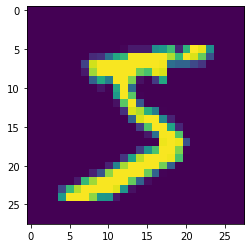

In [5]:
index = 0
fig, (ax1) = plt.subplots(1, 1)
ax1.imshow(x_train_1[index])

## CIFAR-10
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

### Loading dataset and Coverting labels to categorical form
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [6]:
(x_train_2, y_train_2), (x_test_2, y_test_2) = datasets.cifar10.load_data()
y_train_2 = to_categorical(y_train_2, num_classes=10)
y_test_2 = to_categorical(y_test_2, num_classes=10)

170498071/170498071 [==============================] - 7s 0us/step


### Train and Test data shapes

In [7]:
print(x_train_2.shape)
print(y_train_2.shape)

(50000, 32, 32, 3)
(50000, 10)


In [8]:
print(x_test_2.shape)
print(y_test_2.shape)

(10000, 32, 32, 3)
(10000, 10)


### Showing one the dataset examples

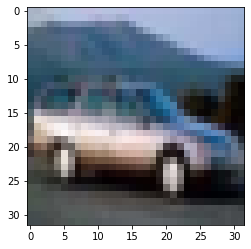

In [9]:
index = 4
fig, (ax1) = plt.subplots(1, 1)
ax1.imshow(x_train_2[index])

## FER-2013
learn more about FER-2013 dataset:
https://www.kaggle.com/datasets/msambare/fer2013

In [58]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [59]:
#!wget https://www.kaggle.com/datasets/msambare/fer2013/download?datasetVersionNumber=1
!unzip -n -q archive.zip
train_dir = './train/'
test_dir = './test/'

### Image Data Generator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Create Image Data Generator for Train and Test sets

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(rescale=1./255)

#### Use **.flow_from_directory(directory)** to read Train and Test sets

In [60]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    batch_size=64,
    target_size=(48, 48),
    # shuffle=True,
    color_mode='grayscale',
    class_mode='categorical',
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    batch_size=64,
    target_size=(48, 48),
    # shuffle=True,
    color_mode='grayscale',
    class_mode='categorical',
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [61]:
print(train_set)
print(test_set)

# Model
https://www.tensorflow.org/api_docs/python/tf/keras/models

https://www.tensorflow.org/api_docs/python/tf/keras/layers


In [31]:
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

## Sequential
https://www.tensorflow.org/guide/keras/sequential_model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [33]:
model_temp_1 = Sequential()

# Input Layer
# Write your code here
model_temp_1.add(keras.layers.Input(shape=(50,50)))
model_temp_1.add(keras.layers.Flatten())
# Hidden Layer
# Write your code here
model_temp_1.add(keras.layers.Dense(units=128, activation='relu'))
# Output Layer
# Write your code here
model_temp_1.add(keras.layers.Dense(units=5, activation='softmax'))

### Model Summary
https://www.tensorflow.org/js/guide/models_and_layers#model_summary

In [34]:
model_temp_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 128)               320128    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 320,773
Trainable params: 320,773
Non-trainable params: 0
_________________________________________________________________


### Plotting Model and Save it as **structure_1.png**
https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model 

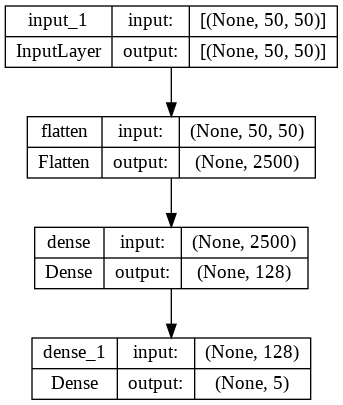

In [35]:
plot_model(
    model_temp_1,
    to_file="structure_1.png",
    show_shapes=True,
    show_layer_names=True,
)

## Functional API 
https://www.tensorflow.org/guide/keras/functional

In [36]:
from tensorflow.keras.models import Model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten

In [37]:
def model_factory(input_shape, num_classes):
    # Input Layer
    # Write your code here
    input= Input(shape=input_shape)
    flatten = Flatten()(input)
    # Hidden Layer
    # Write your code here
    hidden1 = Dense(128, activation='relu')(flatten)
    # Output Layer
    # Write your code here
    output = Dense(num_classes, activation='softmax')(hidden1)
    return Model(inputs=input, outputs=output)

In [38]:
model_template_2 = model_factory(
    input_shape=(50, 50),
    num_classes=5,
)

### Model Summary

In [39]:
model_template_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               320128    
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 320,773
Trainable params: 320,773
Non-trainable params: 0
_________________________________________________________________


### Plotting Model and Save it as **structure_2.png**

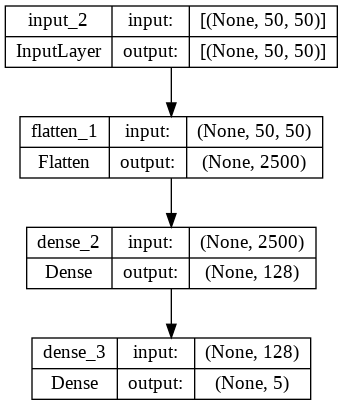

In [40]:
plot_model(
    model_template_2,
    to_file="structure_2.png",
    show_shapes=True,
    show_layer_names=True,
)

## Optimizers and Loss
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [41]:
from tensorflow.keras.optimizers import SGD

In [42]:
# Write your code here
sgd_optimizer = SGD(learning_rate=0.01)

## Compile, Fit and Evaluation
https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

https://keras.io/api/models/model_training_apis/#predict-method

### MNIST

In [44]:
import tensorflow as tf

In [48]:
model_mnist = model_factory(
    input_shape=(28, 28),
    num_classes=10,
)

model_mnist.compile(
    loss ='categorical_crossentropy',
    optimizer=sgd_optimizer,
    metrics=['accuracy'],
)

history = model_mnist.fit(
    x=x_train_1,
    y=y_train_1,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    shuffle=True,
)

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 35.4638 - accuracy: 0.3154 - val_loss: 1.7423 - val_accuracy: 0.3588
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 1.7475 - accuracy: 0.3425 - val_loss: 1.7294 - val_accuracy: 0.3503
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 1.7597 - accuracy: 0.3385 - val_loss: 1.7089 - val_accuracy: 0.3575
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 1.7109 - accuracy: 0.3460 - val_loss: 1.8014 - val_accuracy: 0.3669
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 1.6889 - accuracy: 0.3652 - val_loss: 1.6034 - val_accuracy: 0.4017


#### Plotting model Loss and Accuracy on train and validation sets per epoch

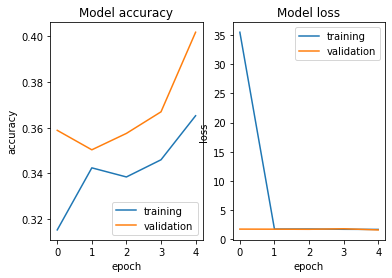

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

#### Evaluating Test set

In [53]:
# Write your code here
model_mnist.evaluate(
    x=x_test_1,
    y=y_test_1,
    batch_size=64,
)

157/157 [==============================] - 0s 2ms/step - loss: 1.6051 - accuracy: 0.3966


[1.6051076650619507, 0.39660000801086426]

#### Predicting Some samples from Test set

In [56]:
# Write your code here
sample_mnist = [0, 10, 20]
for idx in sample_mnist:
    y_predicted = model_mnist.predict(np.array([x_test_1[idx]]))
    print(f"y_predicted : {np.argmax(y_predicted)} , y_true : {np.argmax(y_test_1[idx])}")

1/1 [==============================] - 0s 85ms/step
y_predicted : 7 , y_true : 7
1/1 [==============================] - 0s 45ms/step
y_predicted : 9 , y_true : 0
1/1 [==============================] - 0s 59ms/step
y_predicted : 9 , y_true : 9


### FER-2013

In [62]:
# Write your code here
model_fer = model_factory(
    input_shape=(48, 48, 1),
    num_classes=7
)

# Write your code here
model_fer.compile(
    loss='categorical_crossentropy',
    optimizer=sgd_optimizer,
    metrics=['accuracy'],
)

# Write your code here
history = model_fer.fit(
    x=train_set,
    epochs=5,
    validation_data=train_set,
)

Epoch 1/5
449/449 [==============================] - 67s 149ms/step - loss: 1.8017 - accuracy: 0.2593 - val_loss: 1.7772 - val_accuracy: 0.2726
Epoch 2/5
449/449 [==============================] - 45s 100ms/step - loss: 1.7603 - accuracy: 0.2902 - val_loss: 1.7411 - val_accuracy: 0.2968
Epoch 3/5
449/449 [==============================] - 65s 146ms/step - loss: 1.7375 - accuracy: 0.3092 - val_loss: 1.7188 - val_accuracy: 0.3228
Epoch 4/5
449/449 [==============================] - 66s 148ms/step - loss: 1.7243 - accuracy: 0.3128 - val_loss: 1.7171 - val_accuracy: 0.3231
Epoch 5/5
449/449 [==============================] - 65s 145ms/step - loss: 1.7172 - accuracy: 0.3184 - val_loss: 1.7020 - val_accuracy: 0.3308


#### Plotting model Loss and Accuracy on train and validation sets per epoch

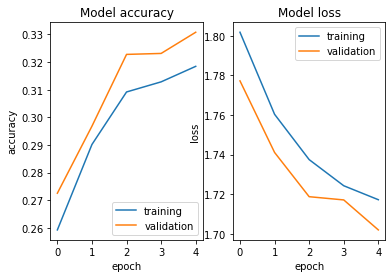

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

#### Evaluating Test set

In [64]:
model_fer.evaluate(
    x=test_set,
)

113/113 [==============================] - 3s 27ms/step - loss: 1.6786 - accuracy: 0.3504


[1.6786015033721924, 0.350376158952713]

#### Predicting Some samples from Test set

113/113 [==============================] - 3s 25ms/step


Text(0.5, 1.0, 'label: happy \n actual: neutral')

<Figure size 432x288 with 0 Axes>

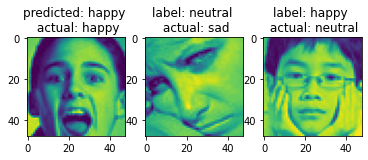

In [65]:
prediction = model_fer.predict(test_set)
# convert prediction to labels
labels = prediction.argmax(axis=-1)

# labels list
label_list = list(test_set.class_indices.keys())

plt.figure()
f, axarr = plt.subplots(1,3) 

# use the created array to output your multiple images.
axarr[0].imshow(np.squeeze(test_set[0][0][5]))
label_1 = label_list[test_set[0][1][5].argmax(axis=-1)]
axarr[1].imshow(np.squeeze(test_set[0][0][29]))
label_2 = label_list[test_set[0][1][29].argmax(axis=-1)]
axarr[2].imshow(np.squeeze(test_set[0][0][10]))
label_3 = label_list[test_set[0][1][10].argmax(axis=-1)]

# Show predicted label for each image
axarr[0].set_title(f'predicted: {label_list[labels[5]]} \n actual: {label_1}')
axarr[1].set_title(f'label: {label_list[labels[29]]} \n actual: {label_2}')
axarr[2].set_title(f'label: {label_list[labels[10]]} \n actual: {label_3}')